# ENG2006 Coursework 2

## Instructions

This assignment carries 15\% of the module mark. Completed work should be submitted via eBART by **12 noon on Friday 29/04/2022**.

#### Asnswering the questions

When answering the questions please keep the following in mind:

+ Your submission should consist of the **present notebook and the imageModel folder created in Question 2 only**, any other files will not be taken into consideration.
+ Each question should be answered in the cell directly after its description. **New cells should not be added to the notebook**.
+ Your questions should consist exclusively of code with comments where necessary.
+ **You should not use any `input` commands**.
+ Whenever requested, **you should use the variable names specified in the description**.

#### Testing your answers

This notebook contains some automated tests, which you can run to test your answers before submission. To do this:

+ Once you have completed each question and executed the corresponding cell, execute the cell directly after it:
    - If your answer passes the tests, a message will appear.
    - If not, an error will be trigered. At the very end of the error message, there will be a possible explanation for why the test failed.
+ Once you have completed all questions, select the option Restart & Run All from the Kernel menu to ensure that all tests can still be pased.

If your answers can pass all the tests and your results seem reasonable, your notebook should be ready for submission. However you should keep in mind that:

+ The tests mainly check that the correct variables are created, and only to a limited extent the validity of the results.
+ Passing the tests does not guarantee the correctness of your solution.
+ Additional tests will be performed after submission.
+ As a result, passing the tests for a specific task does not guarantee that you will be awarded all of the corresponding marks.

#### Submitting your coursework

As mentioned above, your coursework for the python part should consist of the present notebook and the imageModel folder to be created in Question 2 only. Once you have answered all of the questions and tested your answers, save the notebook and add it to a .zip file. **Do not include** the `casting_data` folder provided with the notebook.

## Question 1 [50 marks]

<br />
<br />

<div>
<img src="points.png" width="500" align="center">
</div>

The provided `points.txt` and `labels.txt` files contain coordinates and labels for a set of points in the 2D plane, divided in classes as shown above. Follow the steps below to train a neural network to classify these points:

### Question 1-a [5 marks]

Read the points and labels and plot them with different colors for each class. Store the points in a numpy array named `points` and the labels in an array named `pointLabels`.

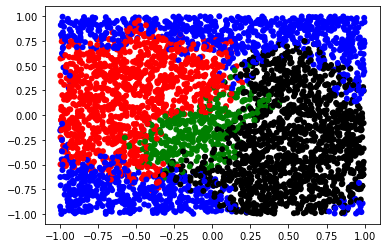

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np
points = np.loadtxt("points.txt", dtype=float)
pointLabels = np.loadtxt("labels.txt", dtype=float)
x=points[:,0]
y=points[:,1]
z=pointLabels
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
colors = ['blue','red','black','green']
ax = fig.add_subplot(111)
ax.scatter(x, y, c=z, lw=0,edgecolor='face',cmap=matplotlib.colors.ListedColormap(colors))

In [10]:
#Run this cell to test your answer for Question 1-a
from tests import question1a

question1a(points,pointLabels)

points and labels seem to be defined properly


### Question 1-b [5 marks]

Divide the data set into three parts by performing:

+ A 50-50 split of the original data resulting in a test set consisting of 50% of the original points. Store the points and labels for the test set in variables named `pointsTest` and `pointLabelsTest` respectively.
+ A 80-20 split of the remaining data resulting in:
    + A training set consisting of 40% of the original data. Store the points and labels for the training set in variables named `pointsTrain` and `pointLabelsTrain` respectively.
    + A validation set consisting of 10% of the original data. Store the points and labels for the validation set in variables named `pointsVal` and `pointLabelsVal` respectively.

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np
from sklearn.model_selection import train_test_split
point_train, pointsTest, label_train, pointLabelsTest = train_test_split(points, pointLabels, test_size=0.50)
pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(point_train, label_train, test_size=0.20)

In [12]:
#Run this cell to test your answer for Question 1-b
from tests import question1b

question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

Training validation and test sets seem to be defined properly


### Question 1-c [30 marks]

Using tensorflow, train a feedforward neural network to classify the points using hyperparemeter tuning and early stopping. More specifically, your training code should:

+ Consider networks with 1,2 and 4 hidden layers with ReLU activation.
+ Consider networks with 64, 128, 256 and 512 hidden units in each layer.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 5 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `modelOpt`. Similarly, the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units should be named `lossValOpt`, `accValOpt`, `layersOpt` and `unitsOpt` respectively.

In [13]:
# YOUR CODE HERE
#raise NotImplementedError()
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
modelOpt=Sequential()
modelOpt.add(Dense(units=64,activation='relu',input_shape=(1600, 2))) #layer1
modelOpt.add(Dense(units=128,activation='relu')) #Layer2
modelOpt.add(Dense(units=256,activation='relu')) #Layer3
modelOpt.add(Dense(units=512,activation='relu')) #Layer4
modelOpt.add(Dense(units=4,activation='softmax')) #output layer.4 units as total 4 class
modelOpt.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
modelOpt.fit(pointsTrain,pointLabelsTrain ,validation_data=(pointsVal, pointLabelsVal),epochs=5)
lossVal=round(min(modelOpt.history.history['val_loss']),1)
accVal=round(max(modelOpt.history.history['val_sparse_categorical_accuracy']),1)
lossOpt,accOpt=modelOpt.evaluate(pointsVal,  pointLabelsVal)
layersOpt=(len(modelOpt.layers)-1)
unitsOpt=modelOpt.layers[0].units

Epoch 1/5
50/50 [==============================] - 0s 10ms/step - loss: 0.7307 - sparse_categorical_accuracy: 0.7194 - val_loss: 0.5801 - val_sparse_categorical_accuracy: 0.7950
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8181 - val_loss: 0.4084 - val_sparse_categorical_accuracy: 0.8375
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.4045 - sparse_categorical_accuracy: 0.8369 - val_loss: 0.4592 - val_sparse_categorical_accuracy: 0.8175
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.3961 - sparse_categorical_accuracy: 0.8363 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.8400
Epoch 5/5
13/13 [==============================] - 0s 530us/step - loss: 0.4334 - sparse_categorical_accuracy: 0.8300


In [14]:
#Run this cell to test your answer for Question 1-c
from tests import question1c

question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,lossVal,accVal,pointsVal,pointLabelsVal)

13/13 [==============================] - 0s 1ms/step - loss: 0.4334 - sparse_categorical_accuracy: 0.8300
The keras model seems to be defined properly!


### Question 1-d [5 marks]

Evaluate the accuracy and loss of the trained model for the test set and store them in variables named `accTest` and `lossTest` respectively. Then, create and plot the confusion matrix for the test set. Store the matrix as well as the corresponding display object in variables named `pointsConfusionMatrix` and `pointsConfusionMatrixPlot` respectively.

63/63 [==============================] - 0s 1ms/step - loss: 0.4010 - sparse_categorical_accuracy: 0.8455


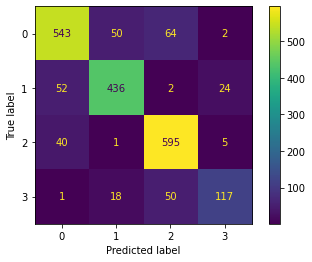

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
lossTest,accTest=modelOpt.evaluate(pointsTest,  pointLabelsTest)
y_pred=modelOpt.predict(pointsTest)
y_predi = [np.argmax(element) for element in y_pred]

pointsConfusionMatrix=confusion_matrix(pointLabelsTest,y_predi)
pointsConfusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=pointsConfusionMatrix)
pointsConfusionMatrixPlot.plot()




In [16]:
#Run this cell to test your answer for Question 1-d
from tests import question1d

question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

The test set accuracy and confusion matrix seem to be defined properly.


### Question 1-e [5 marks]

Using the function provided in lecture 2, create a contour plot of the decision boundary for the trained model.

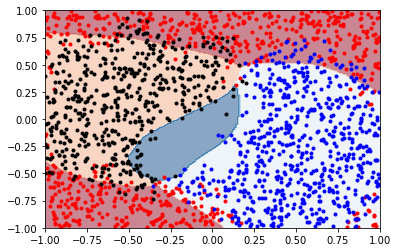

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
def plotDecisionBoundary(model,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu'):
    '''Function to plot the decision boundary of a tensorflow model as a contour plot.
       model is the model, which should have a predict method
       limx, limy are the limits of the plot in x and y
       resolution is the resolution of the plot in terms of the number of points used per direction
       colormap is the colormap to be used for the contour plot
       The function returns a figure and an axis object'''
    
    #create figure
    fig,ax = plt.subplots(1,1)
    
    #create linspaces with the x and y coordinates of the points to be used for the contour plot
    #the limits and resolution are set to the user provided values
    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)
    
    #create a meshgrid from the provided
    xx, yy = np.meshgrid(xPoints, yPoints)
    
    #use model to predict the labels of the generated points
    #ravel and c_ are used to bring the coordinates in the correct shape
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #check shape of the output, if the output is twodimensional and the size in the second dimension is more than 1
    #then the ouput is assumed to be provided in terms of probabilities and is converted to class indices using the argmax function
    if len(modelPred.shape)==2 and modelPred.shape[1]!=1:
        modelPred = np.argmax(modelPred,axis=1)
    else:
    #if the output is either onedimensional or the second dimension has size one, 
    #then it is assumed to be labels for binary classification and a 0.5 threshold is applied to convert to binary format
        modelPred = modelPred>0.5
    
    #reshape the labels to the shape of xx and yy so that they can be used for a contour plot
    z = modelPred.reshape(xx.shape)

    #create contour plot
    ax.contourf(xx,yy,z,cmap=colormap,alpha=0.5)
    
    #return figure and axis
    return fig,ax

#call provided function, with modelSLP3 as input
#this creates a contour plot with different colors used for each class
fig, ax = plotDecisionBoundary(modelOpt)
class0 = np.argwhere(pointLabelsTest==0)
class1 = np.argwhere(pointLabelsTest==1)
class2 = np.argwhere(pointLabelsTest==2)
#plot points of each class using a different color
ax.plot(pointsTest[class0,0],pointsTest[class0,1],'.r')
ax.plot(pointsTest[class1,0],pointsTest[class1,1],'.k')
ax.plot(pointsTest[class2,0],pointsTest[class2,1],'.b')

## Question 2 [50 marks]

<br />
<br />

<div>
<img src="components.png" width="600" align="center">
</div>

The accompanying `casting_data` folder contains images of defective and pristine cast components downloaded from [kaggle](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product). The dataset is already split into training and testing parts, stored in the corresponding folders (`train` and `test` respectively). Within each folder, two folders can be found containing images of the defective and pristine components (`def_front` and `ok_front` respectively).

### Question 2-a [5 marks]

Using the function provided in lecture 3, read the files as grayscale images and plot one image from each set. Store the images and the labels in variables named `imagesTrain`, `imageLabelsTrain`,`imagesTest`, `imageLabelsTest` respectively.

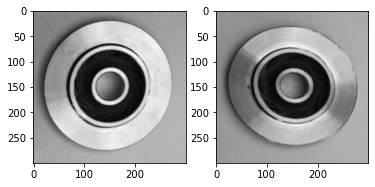

In [1]:
# YOUR CODE HERE
# raise NotImplementedError()
import os
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ok_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\train\ok_front'    # OK Directory
def_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\train\def_front'  # Defect Directory

df_ok_filenames = pd.Series(os.listdir(ok_dir))
df_def_filenames = pd.Series(os.listdir(def_dir))

o1 = df_ok_filenames
d1 = df_def_filenames

df_def_filenames = pd.DataFrame(df_def_filenames,columns=['Filename'])
df_def_filenames['Label'] = 0

df_ok_filenames = pd.DataFrame(df_ok_filenames,columns=['Filename'])
df_ok_filenames['Label'] = 1

df_combined = df_ok_filenames.append(df_def_filenames,ignore_index=True)

df_combined = df_combined.sample(len(df_combined))

imageLabelsTrain = df_combined['Label']
imageLabelsTrain = np.array(imageLabelsTrain)

a  = np.array(df_combined.Filename)

img_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\train\Combined_Front'

paths = []
for i in range(6633):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)
    
data = []
for i in range(6633):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[300,300])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    
imagesTrain = data
imagesTrain = np.array(imagesTrain)



ok_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\test\ok_front'
def_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\test\def_front'

df_ok_filenames = pd.Series(os.listdir(ok_dir))
df_def_filenames = pd.Series(os.listdir(def_dir))

df_def_filenames = pd.DataFrame(df_def_filenames,columns=['Filename'])
df_def_filenames['Label'] = 0

df_ok_filenames = pd.DataFrame(df_ok_filenames,columns=['Filename'])
df_ok_filenames['Label'] = 1

df_combined = df_ok_filenames.append(df_def_filenames,ignore_index=True)
df_combined = df_combined.sample(len(df_combined))

imageLabelsTest = df_combined['Label']
imageLabelsTest = np.array(imageLabelsTest)

a = np.array(df_combined.Filename)
img_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\test\Combined_Front'

paths = []
for i in range(715):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

data = []
for i in range(715):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,[300,300])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    
imagesTest = data
imagesTest = np.array(imagesTest)


ok_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\train\ok_front'    # OK Directory
def_dir = r'C:\Users\KIIT\Desktop\New folder (2)\casting_data\train\def_front'  # Defect Directory

img = o1[34]
image = cv2.imread(os.path.join(ok_dir, img))
plt.subplot(1, 2, 1)
plt.imshow(image)


img2 = d1[34]
image2 = cv2.imread(os.path.join(def_dir, img2))
plt.subplot(1, 2, 2)
plt.imshow(image2)

In [2]:
#Run this cell to test your answer for Question 2-a
from tests import question2a

question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

Images and labels seem to be defined properly.


### Question 2-b [5 marks]

Normalise all the data and further split the training set into training and validation parts (80-20 split).

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
imagesTest = imagesTest/255
imagesTrain = imagesTrain/255

from sklearn.model_selection import train_test_split
imagesTrain,imagesVal,imageLabelsTrain,imageLabelsVal = train_test_split(imagesTrain,imageLabelsTrain,test_size=0.2)


In [4]:
#Run this cell to test your answer for Question 2-b
from tests import question2b

question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

Images labels and training/validation sets seem to be defined properly.


### Quesion 2-c[30 marks]

Using tensorflow, train a convolutional neural network to classify the images. The network should:

- Include two convolutional layers with no more than 128 filters, each followed by a max pooling layer.
- Include a number of dense layers and hidden units of your choice.
- Employ early stopping.
- Train within less than 10-15 minutes. Since the exact timing might change in different computers, this requirement is not strict.
- Achieve at least 95% accuracy for the test set. The loss and accuracy obtained for the test set should be stored in variables named `imageAccTest` and `imageLossTest`.

Determining the exact architecture of the network might require some experimentation. Your submission should only include the final architecture chosen, stored in a model named `imageModel`, along with a few comments justifying these choices.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModel`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()
from keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2D , Flatten
from keras.layers import Dense
from keras.optimizers import Adam

imageModel=Sequential()

img_rows=imagesTrain[0].shape[0]
img_cols=imagesVal[0].shape[1]
imagesTrain=imagesTrain.reshape(imagesTrain.shape[0],img_rows,img_cols,1)
imagesVal=imagesVal.reshape(imagesVal.shape[0],img_rows,img_cols,1)
imagesTest=imagesTest.reshape(715, 300, 300 ,1)

imageModel.add(Convolution2D(filters=8,kernel_size=(3,3),input_shape=(300, 300, 1),activation='relu'))
imageModel.add(MaxPooling2D(pool_size=(2,2),strides=(1, 1)))
imageModel.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu'))
imageModel.add(MaxPooling2D(pool_size=(2,2),strides=(1, 1)))
imageModel.add(Flatten())
imageModel.add(Dense(units=8,activation='relu'))  #input NN
imageModel.add(Dense(units=8,activation='relu')) 
imageModel.add(Dense(units=1,activation='sigmoid'))  #output NN
imageModel.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
imageModel.fit(imagesTrain,imageLabelsTrain,validation_data=(imagesVal, imageLabelsVal),epochs=5)


#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModel.save('imageModel')

Epoch 1/5
166/166 [==============================] - 819s 5s/step - loss: 0.5882 - accuracy: 0.7109 - val_loss: 0.4605 - val_accuracy: 0.8274
Epoch 2/5
166/166 [==============================] - 610s 4s/step - loss: 0.3737 - accuracy: 0.8773 - val_loss: 0.2925 - val_accuracy: 0.9186
Epoch 3/5
166/166 [==============================] - 341s 2s/step - loss: 0.2678 - accuracy: 0.9344 - val_loss: 0.2812 - val_accuracy: 0.9148
Epoch 4/5
166/166 [==============================] - 336s 2s/step - loss: 0.2197 - accuracy: 0.9476 - val_loss: 0.1984 - val_accuracy: 0.9578
Epoch 5/5
166/166 [==============================] - 337s 2s/step - loss: 0.1577 - accuracy: 0.9691 - val_loss: 0.1855 - val_accuracy: 0.9563
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: imageModel\assets


Once your model has successfully trained, you can evaluate its accuracy and loss for the test set in the following cell. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [6]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModel = tf.keras.models.load_model('imageModel')
imageLossTest, imageAccTest = imageModel.evaluate(imagesTest,  imageLabelsTest)
# YOUR CODE HERE
#raise NotImplementedError()

23/23 [==============================] - 8s 363ms/step - loss: 0.1402 - accuracy: 0.9678


In [7]:
#Run this cell to test your answer for Question 2-c
from tests import question2c

question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 297, 297, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 295, 295, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 294, 294, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1382976)           0         
_________________________________________________________________
dense (Dense)                (None, 8)                 11063816  
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 7

### Question 2-d [10 marks]

For the first 4 images of the test set, visualise the output of the first 2 filters of each of the convolutional layers.

FOR IMAGE 1


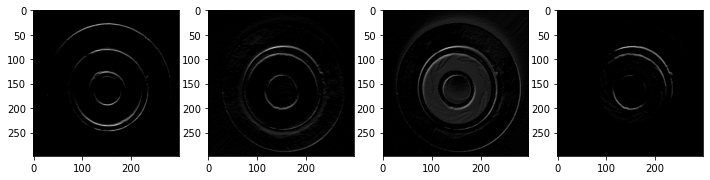

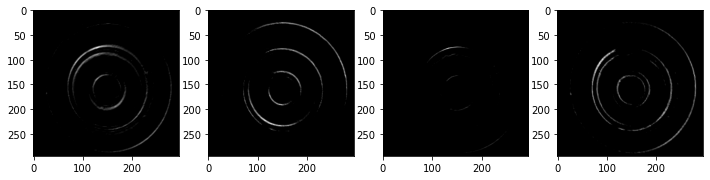

FOR IMAGE 2


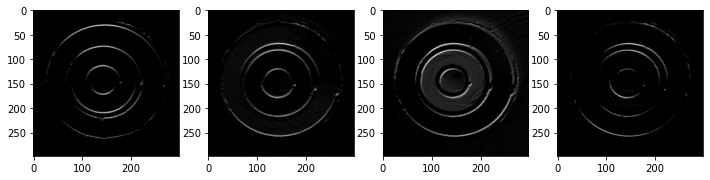

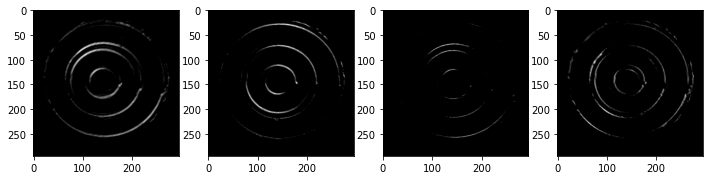

FOR IMAGE 3


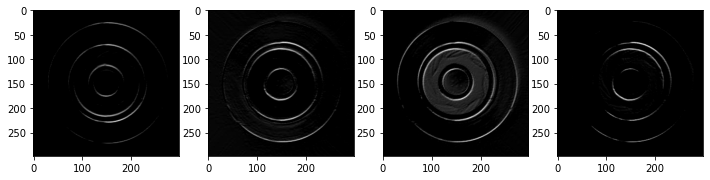

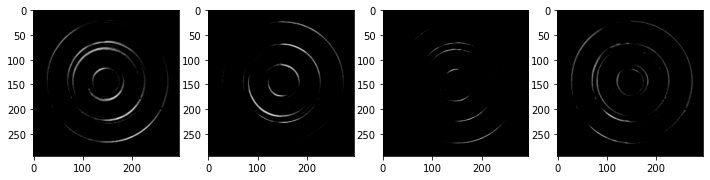

FOR IMAGE 4


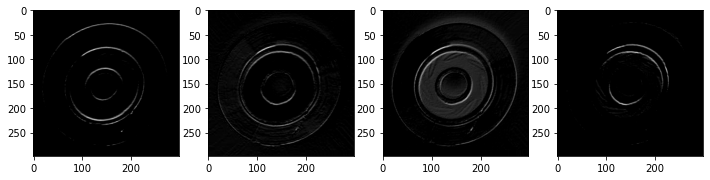

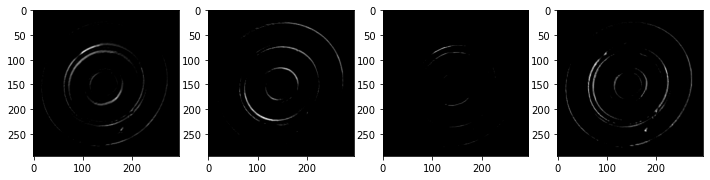

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
from keras.models import Model
conv_layer_index=[0,2]
outputs=[imageModel.layers[i].output for i in conv_layer_index]
model_short=Model(inputs=imageModel.inputs ,outputs=outputs)

img=imagesTest[0]
img=np.expand_dims(img, axis =0)
feature_output=model_short.predict(img)
columns=4
rows=1
print("FOR IMAGE 1")
for ftr in feature_output:
    fig=plt.figure(figsize= (12, 12))
    for i in range(1, columns*rows+1):
        fig=plt.subplot(rows, columns, i)
        plt.imshow(ftr[0, :, :,i-1], cmap='gray')
plt.show()

img2=imagesTest[1]
img2=np.expand_dims(img2, axis =0)
feature_output2=model_short.predict(img2)
columns=4
rows=1
print("FOR IMAGE 2")
for ftr in feature_output2:
    fig=plt.figure(figsize= (12, 12))
    for i in range(1, columns*rows+1):
        fig=plt.subplot(rows, columns, i)
        plt.imshow(ftr[0, :, :,i-1], cmap='gray')
plt.show()

img3=imagesTest[2]
img3=np.expand_dims(img3, axis =0)
feature_output3=model_short.predict(img3)
columns=4
rows=1
print("FOR IMAGE 3")
for ftr in feature_output3:
    fig=plt.figure(figsize= (12, 12))
    for i in range(1, columns*rows+1):
        fig=plt.subplot(rows, columns, i)
        plt.imshow(ftr[0, :, :,i-1], cmap='gray')
plt.show()

img4=imagesTest[3]
img4=np.expand_dims(img4, axis =0)
feature_output4=model_short.predict(img4)
columns=4
rows=1
print("FOR IMAGE 4")
for ftr in feature_output4:
    fig=plt.figure(figsize= (12, 12))
    for i in range(1, columns*rows+1):
        fig=plt.subplot(rows, columns, i)
        plt.imshow(ftr[0, :, :,i-1], cmap='gray')
plt.show()
